In [1]:
import numpy as np
import os
import shutil
import time
import global_params
import cat_params
from image_functions import read_images, show_images, save_images
import bit_functions as bf

# **Read plain images**

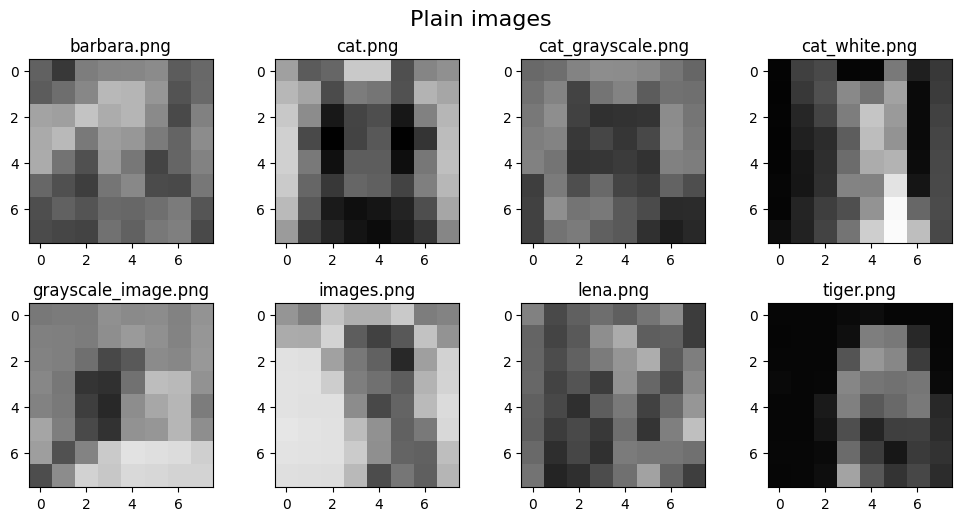

In [2]:
list_os = ['Windows', 'Linux']
OS = list_os[0]
path = 'C:\\Users\\HH\\Documents\\DICOM\\MIE_Cryptography\\' if OS == 'Windows' else '/home/anhpq0/MIE_Cryptography/'
dir_plain = path + 'plain_images'

R_iterations = 5
kI, str_Fnames = read_images(dir_plain, size = (global_params.M, global_params.N), OS = OS)
show_images(kI = kI, suptitle = 'Plain images', str_Fnames = str_Fnames, size = (10, 10), rows = 4, cols = 4)

# Destination folder
dir_cipher = path + 'cipher_images' + global_params.NamePCM

# Decrypted images folder
dir_decrypted = path + 'decrypted' + global_params.NamePCM

if (os.path.exists(dir_cipher)):
    shutil.rmtree(dir_cipher)
os.mkdir(dir_cipher)

if (os.path.exists(dir_decrypted)):
    shutil.rmtree(dir_decrypted)
os.mkdir(dir_decrypted)

# **Parameters**

In [3]:
# kC
kC = kI.copy()
# for k in range(global_params.K):
#     for i in range(global_params.N):
#         for j in range(global_params.M):
#             kC[k][i][j] = global_params.fl2fx(kI[k][i][j])

#kC-
kC_minus = np.copy(global_params.kC0)

#kP+
kP_plus = np.copy(global_params.kP0)
for k in range(global_params.K):
    kP_plus[k] = kC[k][0][1]

In [4]:
# Rules of bit arrangement (list of numpy arrays)
Yp_MN = cat_params.Yp_256x256_Cat if global_params.M == 10 else cat_params.Yp_8x8_Cat

# **Encryption**

In [5]:
print("---------------------------------------------------------")
print("\t\tEncryption Initial Parameters")
print("---------------------------------------------------------")

print("1. kC: \n", kC)
print("\n2. kC_minus: \n", kC_minus)
print("\n3. kP_plus: \n", kP_plus)
print("\n\n")

print("=============================START ENCRYPTION PROCESSING=============================")
for n in range(global_params.Ne):
    start_time = time.time() # Record start time in seconds unit
    print("\n")
    print("\t---------------------------------------------------------")
    print("\t-------------------|      STEP ",n,"   |-------------------")
    print("\t---------------------------------------------------------\n")
    for i in range(global_params.M):
        for j in range(global_params.N):
            print("\n------------------------")
            print("|    Pixel ["+ str(i)+ "], [" + str(j) + "]    |")
            print("------------------------")
            E = bf.MIE_Bit_Manipulation(kC          = kC_minus,
                                        kP          = kP_plus,
                                        output_size = cat_params.k1_cat)
            print("\n1. E: \n", E, "\n")

            X_R = bf.PCM_Cat(E           = E,
                             Y1_FAST_Cat = cat_params.Y1_FAST_Cat,
                             Y2_FAST_Cat = cat_params.Y2_FAST_Cat,
                             Y3_FAST_Cat = cat_params.Y3_FAST_Cat,
                             Y4_FAST_Cat = cat_params.Y4_FAST_Cat,
                             R           = R_iterations)
            print("2. X_R: \n", X_R, "\n")

            XY_new, pseudoVal_string_C, pseudoVal_string_Cx = bf.MIE_FAST_XYnew_pseudoVal(Xn               = X_R, 
                                                                                          XY               = [i, j], 
                                                                                          Yp_MN            = Yp_MN, 
                                                                                          Y_inter_images_p = cat_params.Y_inter_images_p8_Cat, 
                                                                                          Yd_C             = cat_params.Yd_C_Cat, 
                                                                                          Yd_Cx            = cat_params.Yd_Cx_Cat)
            print("3. XY_new: \n", XY_new, "\n")
            print("4. pseudoVal_string_C: \n", pseudoVal_string_C, "\n")
            print("5. pseudoVal_string_Cx: \n", pseudoVal_string_Cx, "\n")

            kC_minus, kP_plus, kC = bf.MIE_FAST_Perm_and_Diff_pixels_ENC(kI                  = kC,
                                                                         XY                  = [i, j],
                                                                         XY_new              = XY_new,
                                                                         pseudoVal_string_C  = pseudoVal_string_C,
                                                                         pseudoVal_string_Cx = pseudoVal_string_Cx,
                                                                         kC_minus            = kC_minus,
                                                                         n                   = n)
            print("\n6. kC_minus: \n", kC_minus)
            print("\n7. kP_plus: \n", kP_plus)
            print("\n8. kC: \n", kC)

    end_time = time.time() # Record end time in senconds unit
    print("Simulation time of step ", n, ": ", end_time - start_time)

save_images(kC, dir_cipher, str_Fnames)

---------------------------------------------------------
		Encryption Initial Parameters
---------------------------------------------------------
1. kC: 
 [array([[ 98,  57, 125, 133, 134, 139,  92, 104],
       [ 92, 110, 135, 184, 181, 150,  83, 105],
       [164, 159, 195, 172, 181, 138,  74, 129],
       [170, 185, 122, 157, 151, 123, 100, 140],
       [171, 115,  80, 153, 119,  68, 101, 130],
       [103,  80,  62, 117, 136,  75,  73, 119],
       [ 78,  98,  84, 105, 103, 111, 123,  85],
       [ 75,  70,  67, 113,  97, 120, 127,  74]], dtype=uint8), array([[160,  91, 102, 201, 201,  79, 133, 144],
       [183, 165,  75, 124, 117,  81, 180, 166],
       [200, 140,  24,  68,  78,  23, 129, 182],
       [208,  73,   1,  67,  88,   1,  52, 188],
       [208, 122,  16,  93,  93,  14, 119, 191],
       [202, 102,  57, 102,  96,  67, 127, 183],
       [186,  88,  26,  15,  21,  35,  78, 166],
       [155,  66,  38,  20,  12,  29,  54, 134]], dtype=uint8), array([[106, 110, 131, 141, 

# **Read cipher image**

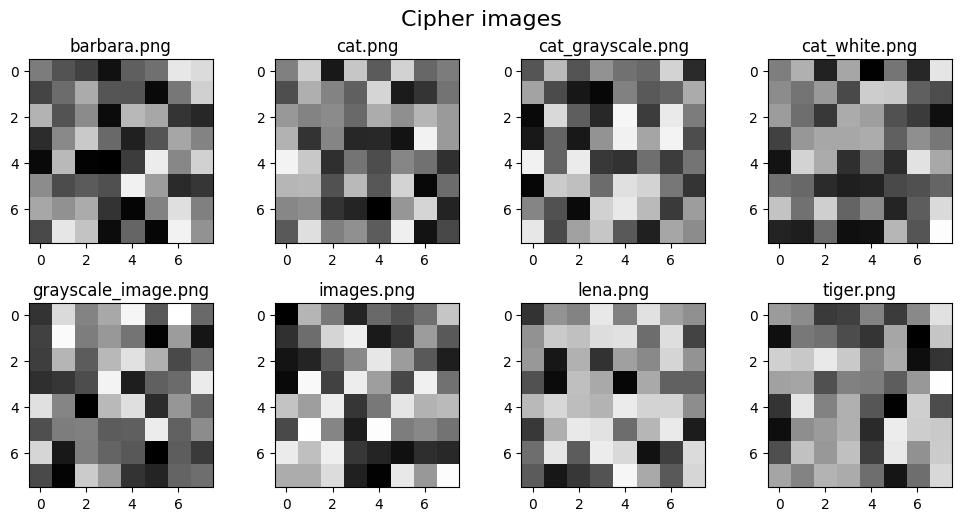

In [6]:
kI_cipher, str_Fnames_cipher = read_images(dir_cipher, size = (global_params.M, global_params.N), OS = OS)
show_images(kI = kI_cipher, suptitle = 'Cipher images', str_Fnames = str_Fnames_cipher, size = (10, 10), rows = 4, cols = 4)

# kC_cipher
kC_cipher = kI_cipher.copy()

#kC_cipher-
kC_cipher_minus = np.copy(global_params.kC0)
for k in range(global_params.K):
    kC_cipher_minus[k] = kC_cipher[k][global_params.M-1][global_params.N-2]

#kP_cipher+
kP_cipher_plus = np.copy(global_params.kP0)

# **Decryption**

---------------------------------------------------------
		Decryption Initial Parameters
---------------------------------------------------------
1. kC_cipher: 
 [array([[124,  83,  66,  17,  95, 112, 231, 219],
       [ 68, 108, 171,  85,  84,   9, 119, 208],
       [180,  83, 139,  11, 184, 167,  52,  39],
       [ 45, 137, 201, 106,  33,  84, 166, 131],
       [  9, 185,   2,   0,  60, 236, 135, 209],
       [140,  76,  91,  80, 241, 157,  42,  54],
       [167, 145, 171,  51,   5, 130, 223, 128],
       [ 74, 230, 196,  12, 101,   6, 242, 146]], dtype=uint8), array([[128, 206,  24, 198,  91, 210, 103, 124],
       [ 78, 175, 132,  96, 213,  27,  52, 115],
       [152, 131, 139, 105, 172, 143, 181, 154],
       [178,  51, 133,  39,  40,  19, 242, 154],
       [244, 200,  47, 116,  77, 134, 113,  49],
       [182, 184,  81, 185,  87, 211,   8, 108],
       [135, 142,  51,  36,   0, 150, 213,  35],
       [ 90, 223, 127, 144,  92, 239,  19,  72]], dtype=uint8), array([[ 85, 186,  84

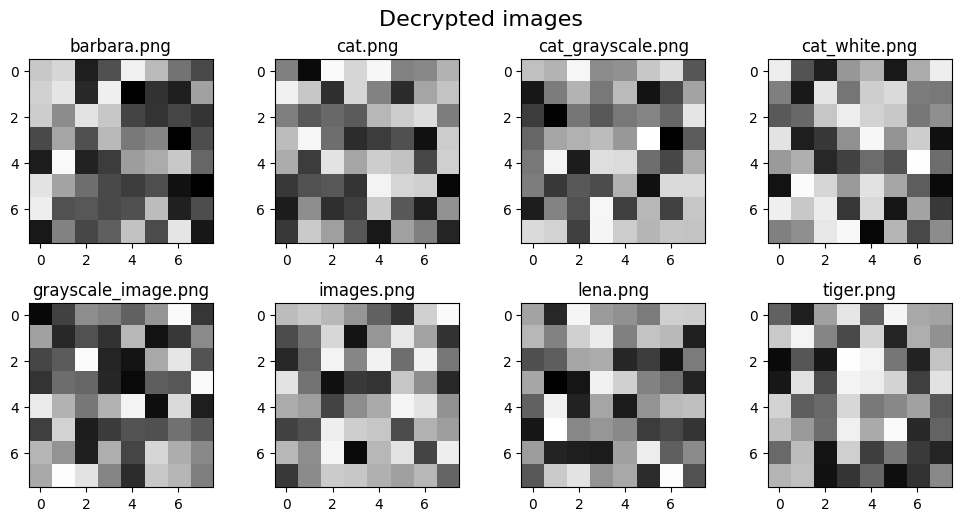

In [7]:
print("---------------------------------------------------------")
print("\t\tDecryption Initial Parameters")
print("---------------------------------------------------------")

print("1. kC_cipher: \n", kC_cipher)
print("\n2. kC_cipher_minus: \n", kC_cipher_minus)
print("\n3. kP_cipher_plus: \n", kP_cipher_plus)
print("\n\n")

print("=============================START DECRYPTION PROCESSING=============================")
for n in range(global_params.Ne - 1, -1, -1):
    start_time = time.time() # Record start time in seconds unit
    print("\n")
    print("\t---------------------------------------------------------")
    print("\t-------------------|      STEP ",n,"   |-------------------")
    print("\t---------------------------------------------------------\n")
    for i in range(global_params.M - 1, -1, -1):
        for j in range(global_params.N - 1, -1, -1):
            print("------------------------")
            print("|    Pixel ["+ str(i)+ "], [" + str(j) + "]    |")
            print("------------------------")
            E = bf.MIE_Bit_Manipulation(kC          = kC_cipher_minus, 
                                        kP          = kP_cipher_plus,
                                        output_size = cat_params.k1_cat)
            print("\n1. E: \n", E, "\n")

            X_R = bf.PCM_Cat(E           = E,
                             Y1_FAST_Cat = cat_params.Y1_FAST_Cat,
                             Y2_FAST_Cat = cat_params.Y2_FAST_Cat,
                             Y3_FAST_Cat = cat_params.Y3_FAST_Cat,
                             Y4_FAST_Cat = cat_params.Y4_FAST_Cat,
                             R           = R_iterations)
            print("2. X_R: \n", X_R, "\n")

            XY_new, pseudoVal_string_C, pseudoVal_string_Cx = bf.MIE_FAST_XYnew_pseudoVal (Xn               = X_R, 
                                                                                           XY               = [i, j], 
                                                                                           Yp_MN            = Yp_MN,
                                                                                           Y_inter_images_p = cat_params.Y_inter_images_p8_Cat,
                                                                                           Yd_C             = cat_params.Yd_C_Cat,
                                                                                           Yd_Cx            = cat_params.Yd_Cx_Cat)
            print("3. XY_new: \n", XY_new, "\n")
            print("4. pseudoVal_string_C: \n", pseudoVal_string_C, "\n")
            print("5. pseudoVal_string_Cx: \n", pseudoVal_string_Cx, "\n")

            kC_cipher_minus, kP_cipher_plus, kC_cipher = bf.MIE_FAST_Perm_and_Diff_pixels_DEC (kC                  = kC_cipher,
                                                                                               XY                  = [i, j],
                                                                                               XY_new              = XY_new,
                                                                                               pseudoVal_string_C  = pseudoVal_string_C,
                                                                                               pseudoVal_string_Cx = pseudoVal_string_Cx,
                                                                                               kC_minus            = kC_cipher_minus,
                                                                                               n                   = n)
            print("\n6. kC_cipher_minus: \n", kC_cipher_minus, "\n")
            print("\n7. kP_cipher_plus: \n", kP_cipher_plus, "\n")
            print("\n8. kC_cipher: \n", kC_cipher, "\n")

    end_time = time.time() # Record end time in senconds unit
    print("Simulation time of step ", n, ": ", end_time - start_time)

save_images(kC_cipher, dir_decrypted, str_Fnames_cipher)
show_images(kI = kC_cipher, suptitle = 'Decrypted images', str_Fnames = str_Fnames_cipher, size = (10, 10), rows = 4, cols = 4)

In [8]:
from fxpmath import Fxp
x = Fxp(1.0, False, 3, 0)
print(x == 1)

True


In [9]:
x = '123'
y = [*x]
print(y)

['1', '2', '3']
